In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime
from geopy.geocoders import Nominatim 
from shapely import wkt
from matplotlib import pyplot as plt

In [3]:
gdf = gpd.read_file("ZipCodesShapes/chicago_shape.shp")
# gdf = gdf.reset_index()
# gdf.index=range(len(gdf))
# gdf[gdf.index == 1].geometry
# gdf['longitude'] = gdf['geometry'].x
# gdf['geometry'][0]

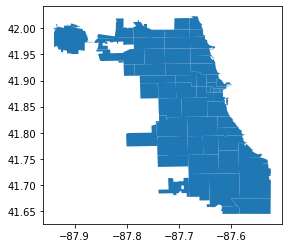

In [4]:
gdf.plot()

In [5]:
df_month = pd.read_csv("CTA_LStation_Data.csv")
df_month["month_beginning"] = pd.to_datetime(df_month['month_beginning'], format='%m/%d/%Y')
df_month_15_19 = df_month[(df_month["month_beginning"] > "2014-12-01") & (df_month["month_beginning"] <= "2020-02-01")]
df_month_20 = df_month[(df_month["month_beginning"] > "2020-02-01")]
df_month_15_19.sort_values(by='month_beginning')
df_month_20.sort_values(by='month_beginning')

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
32759,40900,Howard,2020-03-01,3207.8,1984.8,1744.0,87230
32851,40480,Cicero-Lake,2020-03-01,825.5,507.0,440.2,22389
32852,40030,Pulaski-Lake,2020-03-01,910.4,590.3,491.4,24846
32853,41670,Conservatory,2020-03-01,624.8,443.5,408.2,17560
32854,41070,Kedzie-Lake,2020-03-01,948.3,522.0,438.6,25144
...,...,...,...,...,...,...,...
33665,41330,Montrose-O'Hare,2020-09-01,417.2,288.8,242.0,11126
33666,40550,Irving Park-O'Hare,2020-09-01,1250.7,886.5,724.8,33435
33667,41240,Addison-O'Hare,2020-09-01,643.1,434.0,311.6,16800
33687,40970,Cicero-Forest Park,2020-09-01,616.8,450.8,354.0,16525


In [6]:
df_day = pd.read_csv("CTA_LStation_Daily_Totals.csv")
#03/05/2015
df_day["date"] = pd.to_datetime(df_day["date"], format="%m/%d/%Y")
df_day_15_19 = df_day[(df_day['date'] > "2015-01-01") & (df_day['date'] <= "2020-03-17")]
df_day_20 = df_day[(df_day['date'] >= "2020-03-18")]
df_day_15_19.sort_values(by='date')
df_day_20.sort_values(by='date')
df_mean_1519 = df_day_15_19.groupby(['stationname']).mean()
df_mean_1519['station_id'] = df_mean_1519['station_id']-40000
df_mean_1519 = df_mean_1519.sort_values("station_id")
df_mean_20 = df_day_20.groupby(['stationname']).mean()
df_mean_20['station_id'] = df_mean_20['station_id']-40000
df_mean_20 = df_mean_20.sort_values("station_id")
df_mean_20.to_csv("mean_20.csv", header=True)
df_mean_1519.to_csv("mean_1519.csv", header=True)
print(df_mean_1519)
print(df_mean_20)

                        station_id         rides
stationname                                     
Austin-Forest Park            10.0   1616.424816
Harlem-Lake                   20.0   3199.284963
Pulaski-Lake                  30.0   1304.035752
Quincy/Wells                  40.0   6031.135647
Davis                         50.0   3190.180862
...                            ...           ...
Lake/State                  1660.0  18361.490011
Conservatory                1670.0    815.441640
Oakton-Skokie               1680.0    702.132492
Cermak-McCormick Place      1690.0   1329.792324
Washington/Wabash           1700.0   8227.898958

[145 rows x 2 columns]
                        station_id        rides
stationname                                    
Austin-Forest Park            10.0   357.994924
Harlem-Lake                   20.0   925.802030
Pulaski-Lake                  30.0   523.116751
Quincy/Wells                  40.0   481.736041
Davis                         50.0   597.319797
...

In [7]:
df_mean_1519 = df_mean_1519.reset_index()
df_mean_20 = df_mean_20.reset_index()

In [8]:
gdf_shape = gpd.read_file("CTA_RailStations/CTA_RailStations.shp")
gdf_shape.crs
# gdf_shape["MEAN 15-19"] = df_mean_1519['rides'].to_numpy()
# gdf_shape["MEAN 20"] = df_mean_20['rides'].to_numpy()
# gdf_shape = gdf_shape.sort_values("STATION_ID")
# gdf_shape = gdf_shape.drop(95)
# gdf_shape.to_csv("shape.csv", header=True)
# # gdf_shape = gdf_shape.reset_index()
# gdf_shape

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
values = []
for station_name in df_mean_1519['stationname']:
    if station_name in list(df_mean_20['stationname']):
        values.append(float(df_mean_1519[df_mean_1519['stationname'] == station_name]['rides']))
df_mean_20['precovid'] = values
df_mean_20

,stationname,station_id,rides,precovid
0,Austin-Forest Park,10.0,357.994924,1616.424816
1,Harlem-Lake,20.0,925.802030,3199.284963
2,Pulaski-Lake,30.0,523.116751,1304.035752
3,Quincy/Wells,40.0,481.736041,6031.135647
4,Davis,50.0,597.319797,3190.180862
...,...,...,...,...
138,Lake/State,1660.0,2214.446701,18361.490011
139,Conservatory,1670.0,353.385787,815.441640
140,Oakton-Skokie,1680.0,160.182741,702.132492
141,Cermak-McCormick Place,1690.0,302.375635,1329.792324


In [10]:
values_15 = []
values_20 = []
for station_id in gdf_shape['STATION_ID']:
    if station_id in list(df_mean_20['station_id']):
        values_15.append(float(df_mean_20[df_mean_20['station_id'] == station_id]['precovid']))
        values_20.append(float(df_mean_20[df_mean_20['station_id'] == station_id]['rides']))
    else:
        values_15.append(float(0))
        values_20.append(float(0))
gdf_shape['rides_15_19'] = values_15
gdf_shape['rides_20'] = values_20
gdf_shape.to_csv("shape.csv", header=True)
gdf_shape

,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry,rides_15_19,rides_20
0,1120,35-Bronzeville-IIT,Green Line,16 E. 35th Street,1,0,1.177051e+06,1.882048e+06,41120,POINT (1177050.915 1882047.587),1519.140379,291.558376
1,760,Granville,Red Line,1119 W. Granville Avenue,1,0,1.167506e+06,1.941003e+06,40760,POINT (1167506.039 1941002.514),3558.496845,592.076142
2,1210,Wellington,"Brown, Purple (Express)",945 W. Wellington Avenue,1,0,1.169286e+06,1.920014e+06,41210,POINT (1169286.335 1920014.046),2507.920610,335.847716
3,140,Dempster-Skokie,Yellow Line,5001 W. Dempster Street,1,1,1.142190e+06,1.957320e+06,40140,POINT (1142189.799 1957320.432),1471.023134,295.741117
4,370,Washington/Dearborn,Blue Line,19 N. Dearborn,0,0,1.175927e+06,1.900801e+06,40370,POINT (1175927.284 1900801.153),10698.758675,1286.583756
...,...,...,...,...,...,...,...,...,...,...,...,...
139,420,Cicero-Douglas,Pink,2133 S. 48th Court,1,0,1.144444e+06,1.889180e+06,40420,POINT (1144443.844 1889179.921),1105.563091,423.949239
140,1000,Cermak-Chinatown,Red Line,138 W. Cermak Road,1,0,1.175601e+06,1.889881e+06,41000,POINT (1175600.578 1889880.866),4079.445321,658.289340
141,1680,Oakton-Skokie,Yellow Line,4802 W Oakton,1,0,1.143498e+06,1.952699e+06,41680,POINT (1143497.614 1952698.681),702.132492,160.182741
142,1510,Morgan,"Green (Lake), Pink",1000 W Lake St,1,0,1.169742e+06,1.901630e+06,41510,POINT (1169742.119 1901630.358),2611.304416,484.431472


In [11]:
geolocator = Nominatim(user_agent="geoapiExercises")
zip_codes = []
count = 0
for address in gdf_shape['ADDRESS']:
    print(address)
    if address == '1816 W. Irving Park Dr':
        zip_codes.append(60613)
    else:
        place = address #+ " Chicago"
        location = geolocator.geocode(place)
        if location == None:
            place = address + " Chicago" 
            location = geolocator.geocode(place)
        data = location.raw 
        loc_data = data['display_name'].split() 
        the_zip = loc_data[-3]
        the_zip = the_zip[:5]
        zip_codes.append(int(the_zip))
print(zip_codes)

16 E. 35th Street
1119 W. Granville Avenue
945 W. Wellington Avenue
5001 W. Dempster Street
19 N. Dearborn
4645 N. Western Avenue
1818 W. Addison Street
4643 N. Damen Avenue
121 W. Van Buren Street
608 S. State Street
100 S. Oak Park Avenue
1601 W. Lake Street
502 N. Milwaukee Avenue
1558 N. Damen Avenue
3355 W. Belmont Avenue
4917 N. Milwaukee Avenue
220 W. 47th Street
800 E. 63rd Street
6321 S. Halsted Street
314 E. 47th Street


KeyboardInterrupt: 

In [83]:
# gdf_shape['ZIP CODE'] = zip_codes
# gdf_shape.at[44, 'ZIP CODE'] = 60302
# gdf_shape.to_csv("shape.csv", header=True)
#gdf_shape2 = geopandas.read_file("shape_zip.csv")
gdf = gpd.read_file("ZipCodesShapes/chicago_shape.shp")
gdf_shape2 = pd.read_csv("shape_zip_real.csv")
gdf_shape2['geometry'] = gdf_shape2['geometry'].apply(wkt.loads)
gdf_shape2 = gpd.GeoDataFrame(gdf_shape2, geometry = gdf_shape2['geometry'])
gdf_shape2['Percent Drop'] = (gdf_shape2['rides_15_19']-gdf_shape2['rides_20'])/(gdf_shape2['rides_15_19'])*100
conditions = [(gdf_shape2['Percent Drop'] >= 80),
   (gdf_shape2['Percent Drop']>=60) & (gdf_shape2['Percent Drop']<80),
    (gdf_shape2['Percent Drop']>=40) & (gdf_shape2['Percent Drop']<60),
    (gdf_shape2['Percent Drop']>=20) & (gdf_shape2['Percent Drop']<40),
    (gdf_shape2['Percent Drop']<20)
]
values = ['maroon','red','orange','cyan','navy']
gdf_shape2['color'] = np.select(conditions,values)

,Unnamed: 0,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,...,Percent Drop,color,Average Income,COVID Total Cases,COVID Total Deaths,Total Population,White Population,Black Population,Asian Population,Unemployed
3,127,40,Quincy/Wells,"Brown, Orange, Pink, Purple (Express)",220 S. Wells Street,1,0,1174769.559,1899173.229,40040,...,92.012515,maroon,100377.0,5.353112,0.032248,3287,2318,1.764527,667,2.1
4,59,50,Davis,"Purple Line, Evanston Express",1612 N. Benson Avenue,1,0,1160739.716,1960646.079,40050,...,81.276303,maroon,28026.0,6.601856,0.118679,80059,36060,17.002461,9987,6.8
5,14,60,Belmont-O'Hare,Blue Line,3355 W. Belmont Avenue,0,0,1153202.402,1920656.947,40060,...,79.807336,red,41355.0,5.114678,0.080513,94907,72390,2.891251,5866,3.5
6,39,70,Jackson/Dearborn,Blue Line,328 S. Dearborn,1,0,1175981.497,1898986.072,40070,...,87.913705,maroon,31250.0,8.695652,0.000000,823,532,4.981774,240,7.5
8,7,90,Damen-Ravenswood,Brown Line,4643 N. Damen Avenue,1,0,1162299.355,1931030.291,40090,...,87.694440,maroon,40083.0,5.191626,0.155219,79444,51854,4.831076,10787,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,142,1510,Morgan,"Green (Lake), Pink",1000 W Lake St,1,0,1169742.119,1901630.358,41510,...,81.448679,maroon,40972.0,5.292150,0.016897,29293,17141,14.341310,6345,6.5
138,84,1660,Lake/State,Red Line,188 N. State,1,0,1176365.321,1901404.024,40260,...,87.939722,maroon,77374.0,3.870528,0.054514,15083,11004,4.594577,2859,4.5
139,37,1670,Conservatory-Central Park,Green Line (Lake),3631 W. Lake Street,1,0,1152209.095,1901252.718,41670,...,56.663265,orange,22426.0,5.600420,0.116157,34892,1562,90.682678,53,20.1
141,143,1690,Cermak-McCormick Place,Green Line,12 E. Cermak Rd.,1,0,1176844.653,1889858.017,41690,...,77.261439,red,30625.0,3.655626,0.088132,54197,17058,23.647065,21414,5.3


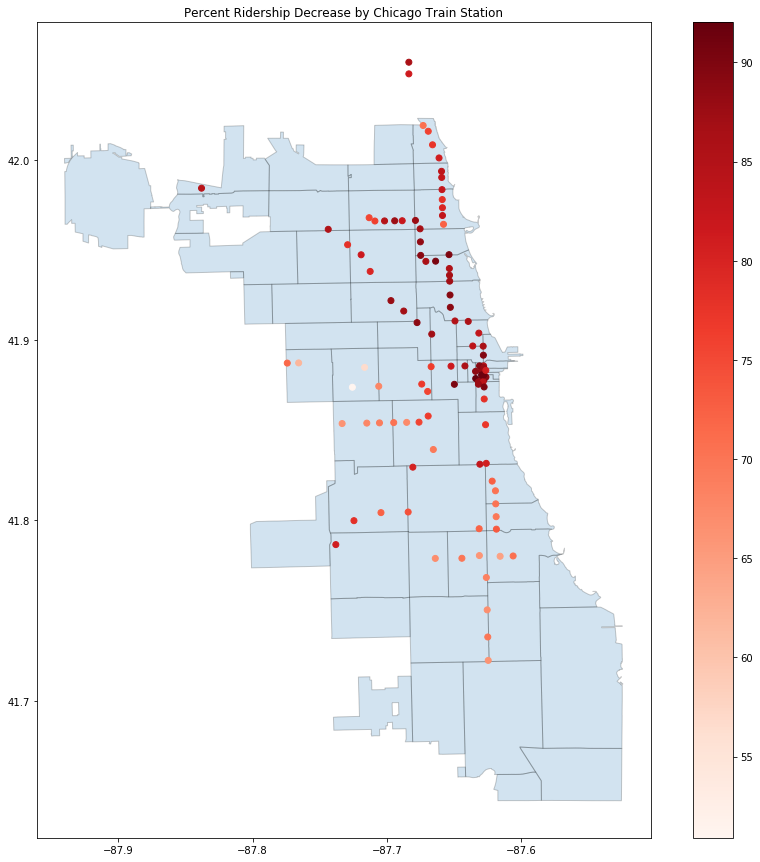

In [84]:
df_covid = pd.read_csv("Covid_ZipCodes.csv")
df_income = pd.read_csv("income.csv")
df_char = pd.read_csv("characteristics.csv")
covid_stats = pd.read_csv('updatedcovid.csv')
df_covid_sum = df_covid.groupby(['ZIP Code']).sum().reset_index()
df_covid_mean = df_covid.groupby(['ZIP Code']).mean().reset_index()
total_cases = []
avg_weekly = []
total_deaths = []
income = []
non_existent = []
non_existent2 = []

total_pop = []
white = []
hisp = []
black = []
asian = []
other = []
employ = []
unemploy = []
at_home = []
total_comm = []
percent_unem = []
for zip_code in gdf_shape2['ZIP CODE']:
    # if str(zip_code) in list(df_covid_sum['ZIP Code']):
    #     # total_cases.append(float(df_covid_sum[df_covid_sum['ZIP Code'] == str(zip_code)]['Cases - Cumulative']))
    #     # total_deaths.append(float(df_covid_sum[df_covid_sum['ZIP Code'] == str(zip_code)]['Death Rate - Cumulative']))
    # else:
    #     non_existent.append(zip_code)
    #     # total_cases.append(float(df_covid_sum[df_covid_sum['ZIP Code'] == 'Unknown']['Cases - Cumulative']))
    #     # total_deaths.append(float(df_covid_sum[df_covid_sum['ZIP Code'] == 'Unknown']['Death Rate - Cumulative']))
    # if str(zip_code) in list(df_covid_mean['ZIP Code']):
    #     avg_weekly.append(float(df_covid_mean[df_covid_mean['ZIP Code'] == str(zip_code)]['Cases - Weekly']))
    # else:
    #     non_existent.append(zip_code)
    #     avg_weekly.append(float(df_covid_mean[df_covid_mean['ZIP Code'] == 'Unknown']['Cases - Weekly']))
    if str(zip_code) in list(df_income['zip']):
        val = float(df_income[df_income['zip'] == str(zip_code)]['income'])
        if val == 0:
            income.append(32955)
        else:
            income.append(val)
    else:
        non_existent2.append(zip_code)
        income.append(32955)
    if int(zip_code) in list(covid_stats['ZIPCodes']):
        total_pop.append(int(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['TOT_POP']))
        white.append(int(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['WHITE']))
        # hisp.append(int(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['HISP']))
        black.append(int(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['BLACK']))
        asian.append(int(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['ASIAN']))
        total_deaths.append(float(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['DeathRate']))
        total_cases.append(float(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['CaseRate']))
        # employ.append(int(df_char[df_char['zip'] == int(zip_code)]['EMP']))
        unemploy.append(float(covid_stats[covid_stats['ZIPCodes'] == int(zip_code)]['UNEMP']))
    #     at_home.append(int(df_char[df_char['zip'] == int(zip_code)]['WORK_AT_HOME']))
    #     total_comm.append(int(df_char[df_char['zip'] == int(zip_code)]['TOT_COMM']))
    #     percent_unem.append(float(df_char[df_char['zip'] == int(zip_code)]['percent_unemployed']))
    # else:
    #     total_pop.append(0)
    #     white.append(0)
    #     hisp.append(0)
    #     black.append(0)
    #     asian.append(0)
    #     other.append(0)
    #     employ.append(0)
    #     unemploy.append(0)
    #     at_home.append(0)
    #     total_comm.append(0)
    #     percent_unem.append(0)

gdf_shape2['Average Income'] = income
indexNames = gdf_shape2[ gdf_shape2['Average Income'] == 32955.0].index
gdf_shape2.drop(indexNames , inplace=True)

# gdf_shape2['Average Weekly Cases'] = avg_weekly
gdf_shape2['COVID Total Cases'] = total_cases
gdf_shape2['COVID Total Deaths'] = total_deaths

gdf_shape2['Total Population'] = total_pop
# gdf_shape2['COVID Total Deaths'] = (gdf_shape2['COVID Total Deaths']/gdf_shape2['Total Population'])
gdf_shape2['White Population'] = white
gdf_shape2['Black Population'] = black
gdf_shape2['Black Population'] = (gdf_shape2['Black Population']/gdf_shape2['Total Population'])*100
# gdf_shape2['Black Population'] = (gdf_shape2['Black Population']/gdf_shape2['Total Population'])
# gdf_shape2['Hispanic Population'] = hisp
gdf_shape2['Asian Population'] = asian
# gdf_shape2['Other Population'] = other
# gdf_shape2['Employed'] = employ
gdf_shape2['Unemployed'] = unemploy
# gdf_shape2['Work from Home'] = at_home
# gdf_shape2['Total Comm'] = total_comm
# gdf_shape2['Percent Unemployed'] = percent_unem



fig,ax = plt.subplots(figsize = (15,15))
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=4326)
# print(gdf.crs)
gdf_shape2 = gdf_shape2.set_crs(epsg=3435)
gdf_shape2 = gdf_shape2.to_crs(epsg=4326)
# set_crs({'init': 'epsg:4326'})
# gdf_shape2 = gdf_shape2.to_crs(epsg=4326)
# print(gdf_shape2.crs)
gdf.plot(legend=True, ax=ax, alpha = 0.2, edgecolor = 'black')
# gdf_shape2.plot(ax=ax, legend=True, color = gdf_shape2['color'])
gdf_shape2.plot(ax=ax, column = 'Percent Drop', legend = True, cmap = 'Reds')
plt.title('Percent Ridership Decrease by Chicago Train Station')
# gdf_shape2.crs
gdf_shape2.to_csv("regression.csv", header=True)
gdf_shape2

In [81]:
gdf_shape2.dtypes

Unnamed: 0               int64
STATION_ID               int64
LONGNAME                object
LINES                   object
ADDRESS                 object
ADA                      int64
PKNRD                    int64
POINT_X                float64
POINT_Y                float64
GTFS                     int64
geometry              geometry
rides_15_19            float64
rides_20               float64
ZIP CODE                 int64
Percent Drop           float64
color                   object
Average Income         float64
COVID Total Cases      float64
COVID Total Deaths     float64
Total Population         int64
White Population         int64
Black Population         int64
Asian Population         int64
Unemployed             float64
dtype: object

In [63]:
covid_stats = pd.read_csv('updatedcovid.csv')
covid_stats

,Unnamed: 0,ZIPCodes,Cases,Deaths,Population,income,TOT_POP,WHITE,BLACK,ASIAN,UNEMP,geometry,UMEMP count,UMEMPcount,UNEMPcount,CaseRate,DeathRate
0,0,60603,33,0,1174,61815,1052,661,41,337,9.1,POLYGON ((-87.61633485348139 41.88211174382143...,95.732,95.732,95.732,2.810903,0.000000
1,1,60606,166,1,3101,100377,3287,2318,58,667,2.1,POLYGON ((-87.63397066191104 41.88752780630392...,69.027,69.027,69.027,5.353112,0.032248
2,2,60607,1566,5,29591,40972,29293,17141,4201,6345,6.5,POLYGON ((-87.63962333812347 41.87677112685046...,1904.045,1904.045,1904.045,5.292150,0.016897
3,3,60609,4670,95,61495,25705,60939,26724,15282,3799,15.0,"POLYGON ((-87.6266459027657 41.83090586117797,...",9140.850,9140.850,9140.850,7.594113,0.154484
4,4,60610,1901,16,39019,51294,40548,29332,6041,3565,3.2,POLYGON ((-87.62819938105604 41.89667739363123...,1297.536,1297.536,1297.536,4.871985,0.041006
5,5,60604,68,0,782,31250,823,532,41,240,7.5,"POLYGON ((-87.63375869381524 41.8792423084654,...",61.725,61.725,61.725,8.695652,0.000000
6,6,60611,1286,6,32426,69889,33224,24941,967,6205,3.0,POLYGON ((-87.61401200402452 41.89353997745442...,996.720,996.720,996.720,3.965953,0.018504
7,7,60612,2012,37,34311,25143,33735,9902,20122,1490,9.9,"POLYGON ((-87.67704471944801 41.895638811791, ...",3339.765,3339.765,3339.765,5.864009,0.107837
8,8,60615,1307,20,41563,31571,40590,12617,22248,3491,9.0,POLYGON ((-87.58103206762146 41.80421129714134...,3653.100,3653.100,3653.100,3.144624,0.048120
9,9,60601,568,8,14675,77374,15083,11004,693,2859,4.5,POLYGON ((-87.62271368513663 41.88883592247636...,678.735,678.735,678.735,3.870528,0.054514
